Imports

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

Lecture 3 exercice :

C:\Users\arthu\AppData\Local\Temp\ipykernel_11332\799218065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['Age'].fillna(reduced_df['Age'].mean(), inplace=True)


Model 0: max_depth=2, accuracy=0.7653631284916201
Model 1: max_depth=3, accuracy=0.8044692737430168
Model 2: max_depth=4, accuracy=0.770949720670391
Model 3: max_depth=5, accuracy=0.7821229050279329
Model 4: max_depth=6, accuracy=0.770949720670391


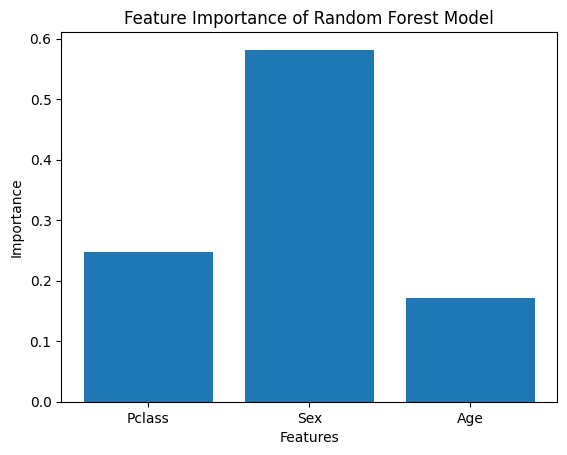

In [24]:
# Load the Titanic dataset into a Pandas dataframe
titanic_df = pd.read_csv('data/titanic.csv')

# Obtain a reduced dataset D that only contains the following features: Survived, Pclass, Sex, and Age:
reduced_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age']]

# Preprocess the data by transforming categorical variables into numerical variables and imputing missing values:
reduced_df.loc[reduced_df['Sex'] == 'male', 'Sex'] = 0
reduced_df.loc[reduced_df['Sex'] == 'female', 'Sex'] = 1
reduced_df['Age'].fillna(reduced_df['Age'].mean(), inplace=True)

# Split the dataset D into training and validation/test datasets:
X = reduced_df.drop('Survived', axis=1)
y = reduced_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a decision tree model using the training dataset:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(X_train, y_train)

# Evaluate the decision tree model using the validation/test dataset:
y_pred = dt_model.predict(X_test)
accuracy_score(y_test, y_pred)

# Build multiple decision tree models with different parameters and compare their accuracies:
models = []
accuracies = []

for max_depth in [2, 3, 4, 5, 6]:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    models.append(model)
    accuracies.append(accuracy)
    
for i, accuracy in enumerate(accuracies):
    print(f'Model {i}: max_depth={i+2}, accuracy={accuracy}')

# Build a random forest model using the training dataset:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(X_train, y_train)

# Evaluate the random forest model using the validation/test dataset:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

# Plot the feature importances of the random forest model:
importances = rf_model.feature_importances_
features = X.columns

plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance of Random Forest Model')
plt.show()

Lecture 4 exercice 2 :

In [27]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(reduced_df.drop(['Survived'], axis=1), reduced_df['Survived'], test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting KNN to unscaled data
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
print('Accuracy without scaling:', knn_unscaled.score(X_test, y_test))

# Fitting KNN to scaled data
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
print('Accuracy with scaling:', knn_scaled.score(X_test_scaled, y_test))


Accuracy without scaling: 0.7877094972067039
Accuracy with scaling: 0.7988826815642458


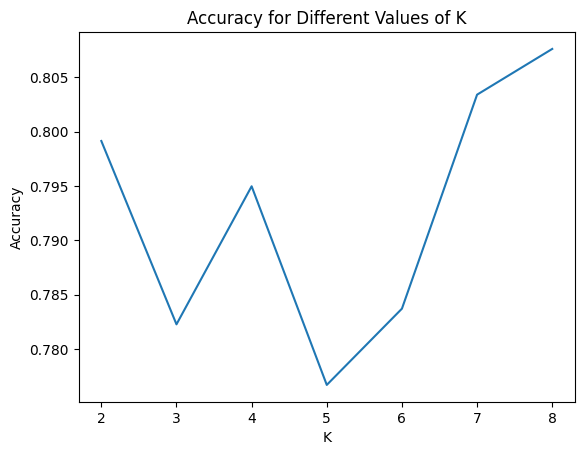

In [29]:
# Validating different values of K using stratified 3-fold cross-validation
k_values = range(2, 9)
k_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the accuracy scores for different K values
plt.plot(k_values, k_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of K')
plt.show()

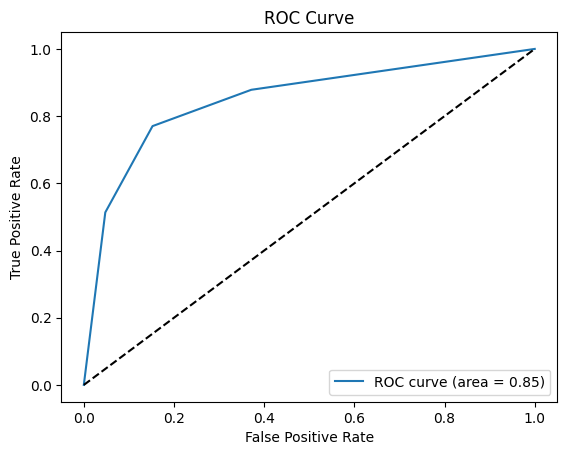

In [28]:
# Choosing K=3 based on results of cross-validation
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predicting probabilities of class 1 (survived) for test data
y_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Calculating ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plotting the ROC curve and displaying the AUC score
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()